## TANZANIAN WATER WELLS ##

** BUSINESS UNDERSTANDING **


Problem Statement:
Access to clean and potable water is a pressing issue in Tanzania, with many water wells being non-functional or in need of repair. Our stakeholder, the World Health Organization (WHO), aims to address this problem by drilling new water wells and revitalizing existing ones throughout the country. As data scientists, our objective is to analyze the data to identify patterns among non-functional wells. By leveraging these patterns, we can provide valuable insights to guide the construction of new wells. Additionally, we will develop a predictive model to accurately identify existing water points that require intervention, thus ensuring the Tanzanian population has consistent access to clean drinking water.


Specific Objectives:


1. Uncover patterns and trends within the dataset to identify distinguishing characteristics between functional and non-functional wells.
2. Develop a machine learning model that can accurately predict the functionality of wells in Tanzania based on available variables.
3. Extract insights from the data to propose recommendations for building better wells and improving the maintenance and repair process.



Research Questions:


1. How can machine learning techniques and classification methods be applied to effectively predict the functionality of wells in Tanzania?
2. Are there specific features or variables that consistently differentiate functional wells from non-functional ones?
3. What measures can be taken to enhance the construction process and ensure the provision of high-quality water to communities?



Success Metrics:


1. Implementation of newly constructed wells that provide communities with a reliable supply of good-quality water.
2. Development of a predictive model that accurately classifies the functionality of wells with a minimum accuracy of 80%.
3. Derivation of actionable insights from the data to improve the design, construction, and maintenance of wells, leading to enhanced performance and longevity.

**Data Understanding**


This phase involves several tasks that aim to gain a comprehensive understanding of the data provided by our stakeholder, the World Health Organization. Each task has specific expected outcomes and contributes to the overall understanding of the dataset.

Task 1: Collect Initial Data
Collecting the initial data is the first step in the data understanding phase. The dataset provided by the World Health Organization includes information on wells in Tanzania. This dataset serves as the foundation for our analysis and model development.

Task 2: Describe Data
The next task is to describe the data, which involves examining the structure and characteristics of the dataset. By analyzing the features, their descriptions, and the overall composition of the dataset, we can gain insights into the data's organization and identify relevant variables for our analysis.

Task 3: Explore Data
Exploring the data allows us to uncover patterns, relationships, and potential insights within the dataset. By visualizing distributions, examining correlations, and exploring relationships between variables, we can gain a deeper understanding of the data and identify key factors that may impact well functionality.

Task 4: Verify Data Quality
Ensuring data quality is crucial for reliable analysis and model development. In this task, we assess the quality of the dataset, including identifying and handling missing data, addressing outliers, and addressing any inconsistencies or inaccuracies. By verifying data quality, we can enhance the reliability and accuracy of our analysis and models.

By completing these tasks, we will have a thorough understanding of the dataset provided by the World Health Organization, allowing us to proceed with confidence to the next stages of our project.

Loading the necessary libraries:

DATA UNDERSTANDING:

In [716]:
# Import libraries
#to load data
import pandas as pd
import numpy as np

# to plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Decided to work with the training set values and the training set lables data set.

In [717]:

# Load the dataset
#This is the training_set_values dataset
data1 = pd.read_csv('training_set_values.csv')
data1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [718]:
#info of the data 

def data_info(data1):
    """Simple function to provide the info of the data"""
    out = print(data1.info(), '\n')
    
    return out

In [719]:
#shape of the data 

def data_shape(data1):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data1.shape[0]} rows\n\t* {data1.shape[1]} columns", '\n')

    return out

In [720]:
def data_missing(data1):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data1.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [721]:
# helper function to check for duplicates

def identify_duplicates(data1):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data1.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')


In [722]:
# helper function to check for descriptive stats

def data_describe(data1):
    """Simple function to check the descriptive values of the data"""
    out = print(data1.describe(), '\n')
    
    return out


In [723]:
# overall function for data understanding

def explore(data1):
    """Group of functions to explore data """
    out1 = data_shape(data1)
    out2 = data_info(data1)
    out3 = data_missing(data1)
    out4 = identify_duplicates(data1)
    out5 = data_describe(data1)
    
    return out1, out2, out3, out4, out5


explore(data1)


The DataFrame has:
	* 59400 rows
	* 40 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distr

(None, None, None, None, None)

In [724]:
explore(data1)

The DataFrame has:
	* 59400 rows
	* 40 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  distr

(None, None, None, None, None)

In [725]:
data2 = pd.read_csv('training_set_labels.csv')
data2

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


The training_set_values DataFrame has:
 59400 rows 40 columns

 It also has has missing values  and no duplicates . 


In [726]:
data1[['subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']].head()

,subvillage,region,region_code,district_code,lga,ward
0,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Nyamara,Mara,20,2,Serengeti,Natta
2,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi


In [727]:
data1[data1.scheme_management.str.lower() != data1.management.str.lower()]\
       [['scheme_management', 'scheme_name', 'management', 'management_group', 'recorded_by']].head(10)

,scheme_management,scheme_name,management,management_group,recorded_by
1,Other,NaN,wug,user-group,GeoData Consultants Ltd
4,NaN,NaN,other,other,GeoData Consultants Ltd
7,NaN,NaN,wug,user-group,GeoData Consultants Ltd
9,NaN,NaN,vwc,user-group,GeoData Consultants Ltd
18,NaN,NaN,vwc,user-group,GeoData Consultants Ltd
23,Water authority,Mashangwi,vwc,user-group,GeoData Consultants Ltd
27,NaN,NaN,vwc,user-group,GeoData Consultants Ltd
31,WUA,Chalinze wate,private operator,commercial,GeoData Consultants Ltd
35,NaN,NaN,vwc,user-group,GeoData Consultants Ltd
54,NaN,NaN,private operator,commercial,GeoData Consultants Ltd


In [728]:
df = pd.concat([data1, data2], axis=1)

In [729]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [730]:
# drop 'id' column
df = df.drop('id', axis=1).copy()


In [731]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

** LOOKING INTO COLUMNS 

In [732]:
df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [733]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [734]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

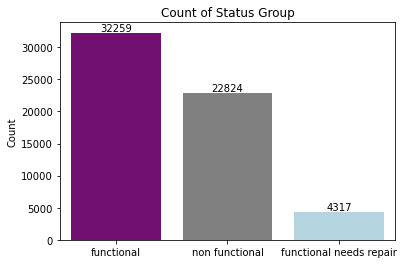

In [735]:
fig, ax = plt.subplots()

colors = ["purple", "grey", "lightblue"]  # Custom colors for the bars

sns.barplot(x=df['status_group'].value_counts().index, y=df['status_group'].value_counts(), ax=ax, palette=colors)
ax.set_title('Count of Status Group')
ax.set_ylabel('Count')

# Add labels to the bars
for i, v in enumerate(df['status_group'].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


To address the challenges of imbalanced target values, null values, and duplicated information in the dataset, we will take the following steps:

1. Drop duplicate or overlapping columns: Remove columns that contain the same values or duplicate information as other columns, as they do not provide additional insights.

2. Handle null values: Address missing or null values by either removing rows with missing values or imputing the missing values using appropriate techniques.

3. Address class imbalance: Apply techniques such as oversampling, undersampling, or using algorithms specifically designed for imbalanced data to mitigate the impact of imbalanced target values.

By dropping duplicate columns, handling null values, and addressing class imbalance, we simplify the dataset and enhance the model's ability to learn meaningful patterns, resulting in more effective model implementation.

** DATA PREPARATION **    

To address multicollinearity concerns and reduce the dimensionality of the data, overlapping features such as `waterpoint_type` and `waterpoint_type_group`, as well as `extraction_type`, `extraction_type_group`, and `extraction_type_class`, were analyzed. The decision was made to retain the most generic columns for each set of overlapping features.

Additionally, certain features like `num_private` lacked clear descriptions to explain their meaning and relevance. Consequently, these features were not included in the analysis to avoid potential issues and ensure clarity in the interpretation of the data.

scheme_management / management / management_group columns


In [736]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [737]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

To simplify the dataset and avoid redundancy, we will drop the column 'scheme_management' since it represents similar information as the 'management' column. Furthermore, the 'management_group' column provides similar information regarding how the water point is managed. Considering the presence of 3877 null values in the 'scheme_management' column, we choose to retain the 'management' column for further analysis and modeling.

In [738]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [739]:
df.groupby(['management_group','management']).count() 
# to see how many sub-groups have in management group according to management column

amount_tsh  date_recorded  funder  \
management_group management                                            
commercial       company                  685            685     663   
                 private operator        1971           1971    1957   
                 trust                     78             78      78   
                 water authority          904            904     836   
other            other                    844            844     837   
                 other - school            99             99      99   
parastatal       parastatal              1768           1768    1624   
unknown          unknown                  561            561     533   
user-group       vwc                    40507          40507   37632   
                 water board             2933           2933    2715   
                 wua                     2535           2535    2308   
                 wug                     6515           6515    6483   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        663        685       685   
                 private operator        1971       1959       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        836        904       904   
other            other                    844        831        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1626       1768      1768   
unknown          unknown                  561        527        561       561   
user-group       vwc                    40507      37630      40507     40507   
                 water board             2933       2714       2933      2933   
                 wua                     2535       2309       2535      2535   
                 wug                     6515       6473       6515      6515   

                                   wpt_name  num_private  basin  ...  \
management_group management                                      ...   
commercial       company                685          685    685  ...   
                 private operator      1971         1971   1971  ...   
                 trust                   78           78     78  ...   
                 water authority        904          904    904  ...   
other            other                  844          844    844  ...   
                 other - school          99           99     99  ...   
parastatal       parastatal            1768         1768   1768  ...   
unknown          unknown                561          561    561  ...   
user-group       vwc                  40507        40507  40507  ...   
                 water board           2933         2933   2933  ...   
                 wua                   2535         2535   2535  ...   
                 wug                   6515         6515   6515  ...   

                                   water_quality  quality_group  quantity  \
management_group management                                                 
commercial       company                     685            685       685   
                 private operator           1971           1971      1971   
                 trust                        78             78        78   
                 water authority             904            904       904   
other            other                       844            844       844   
                 other - school               99             99        99   
parastatal       parastatal                 1768           1768      1768   
unknown          unknown                     561            561       561   
user-group       vwc                       40507          40507     40507   
                 water board       

Extraction_type, Extraction_type_group, Extraction_type_class Columns

In [740]:
df['extraction_type'].value_counts()


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [741]:
df['extraction_type_group'].value_counts()


gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [742]:
df['extraction_type_class'].value_counts()


gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [743]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group


amount_tsh  date_recorded  \
extraction_type_class extraction_type_group                              
gravity               gravity                     26780          26780   
handpump              afridev                      1770           1770   
                      india mark ii                2400           2400   
                      india mark iii                 98             98   
                      nira/tanira                  8154           8154   
                      other handpump                364            364   
                      swn 80                       3670           3670   
motorpump             mono                         2865           2865   
                      other motorpump               122            122   
other                 other                        6430           6430   
rope pump             rope pump                     451            451   
submersible           submersible                  6179           6179   
wind-powered          wind-powered                  117            117   

                                             funder  gps_height  installer  \
extraction_type_class extraction_type_group                                  
gravity               gravity                 24704       26780      24714   
handpump              afridev                  1668        1770       1665   
                      india mark ii            2358        2400       2358   
                      india mark iii             98          98         98   
                      nira/tanira              7899        8154       7885   
                      other handpump            353         364        354   
                      swn 80                   3596        3670       3593   
motorpump             mono                     2577        2865       2578   
                      other motorpump           122         122        122   
other                 other                    6010        6430       6002   
rope pump             rope pump                 448         451        448   
submersible           submersible              5820        6179       5816   
wind-powered          wind-powered              112         117        112   

                                             longitude  latitude  wpt_name  \
extraction_type_class extraction_type_group                                  
gravity               gravity                    26780     26780     26780   
handpump              afridev                     1770      1770      1770   
                      india mark ii               2400      2400      2400   
                      india mark iii                98        98        98   
                      nira/tanira                 8154      8154      8154   
                      other handpump               364       364       364   
                      swn 80                      3670      3670      3670   
motorpump             mono                        2865      2865      2865   
                      other motorpump              122       122       122   
other                 other                       6430      6430      6430   
rope pump             rope pump                    451       451       451   
submersible           submersible                 6179      6179      6179   
wind-powered          wind-powered                 117       117       117   

                                             num_private  basin  ...  \
extraction_type_class extraction_type_group                      ...   
gravity               gravity                      26780  26780  ...   
handpump              afridev                       1770   1770  ...   
                      india mark ii                 2400   2400  ...   
                      india mark iii                  98     98  ...   
                      nira/tanira                   8154   8154  ...   
                      other handpump                 364    364  ...   
                

To eliminate redundancy and enhance the dataset's simplicity, we will retain the 'extraction_type_group' column and drop the 'extraction_type' and 'extraction_type_class' columns. Despite 'extraction_type' having more unique values, some of these values occur infrequently in the dataset. Therefore, we opt for the more concise 'extraction_type_group' column. Additionally, 'extraction_type_class' provides less detailed information. By selecting 'extraction_type_group', we maintain relevant information while reducing complexity in the dataset.

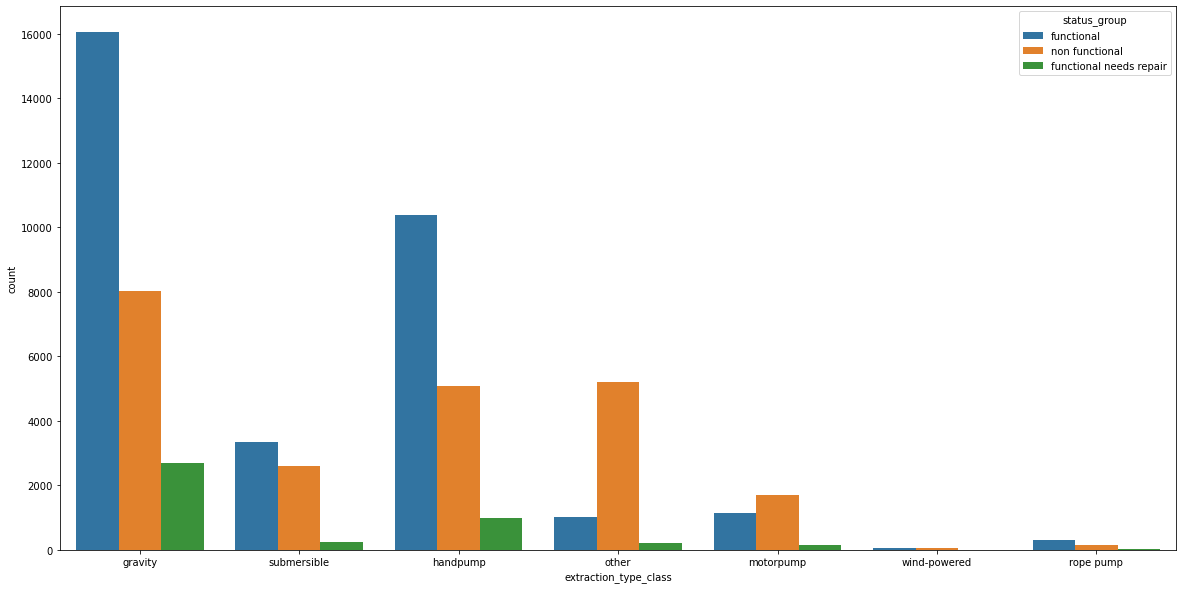

In [744]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

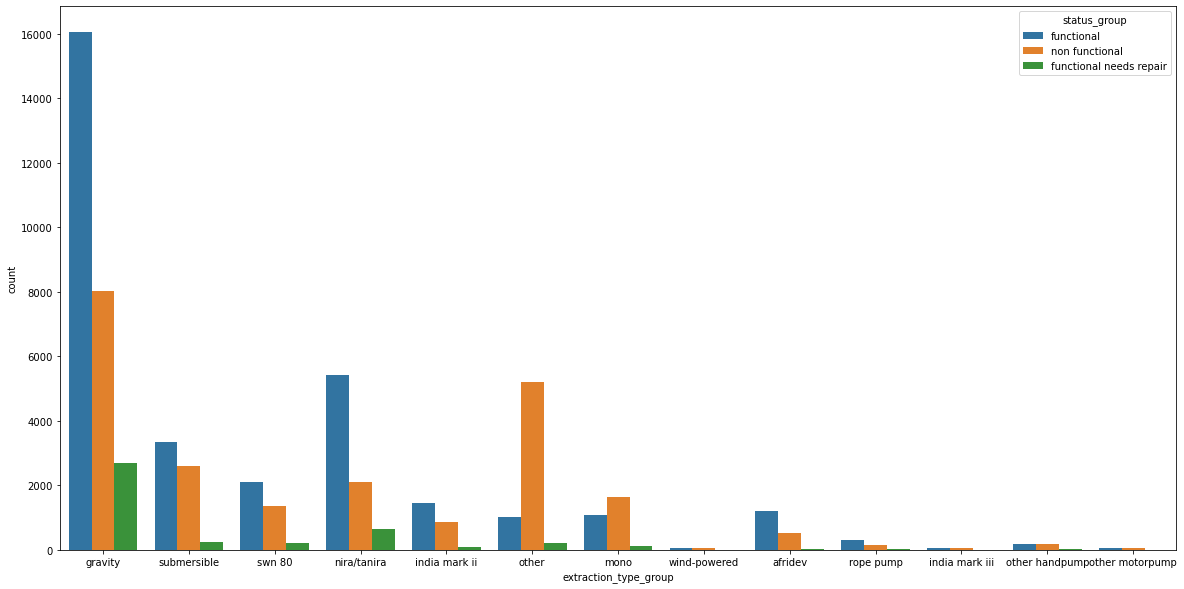

In [745]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

Payment', Payment_type Columns 

In [746]:
df['payment'].value_counts()


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [747]:
df['payment_type'].value_counts()


never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Since the columns are basically the same decided to drop one.

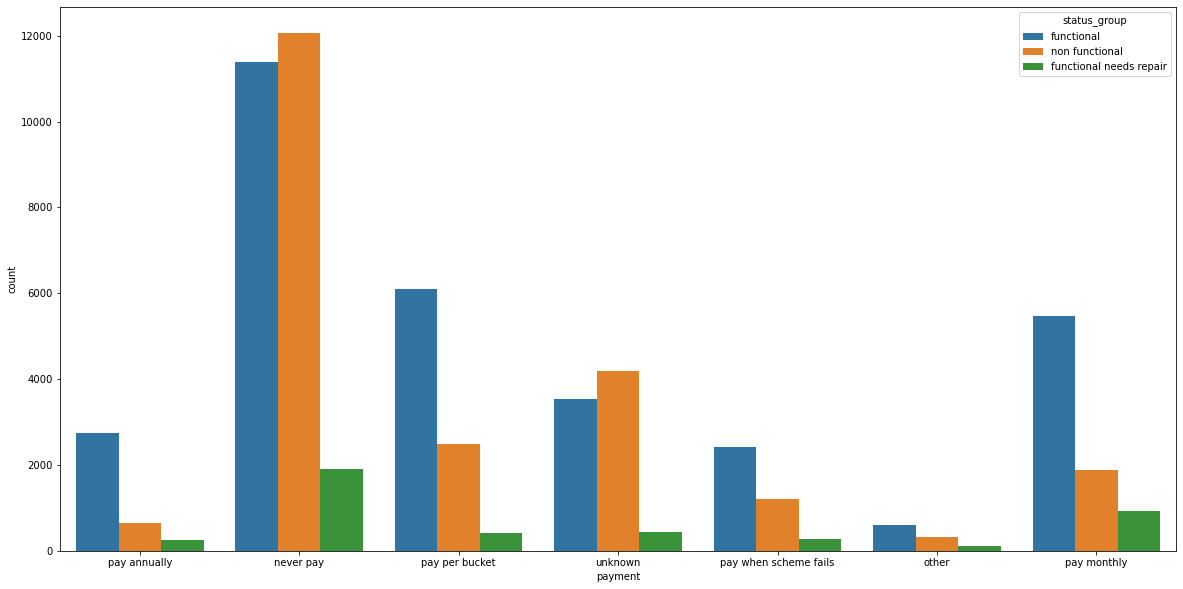

In [748]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

Water_quality, Quality_group Columns

In [749]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [750]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [751]:
df.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

#'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'.


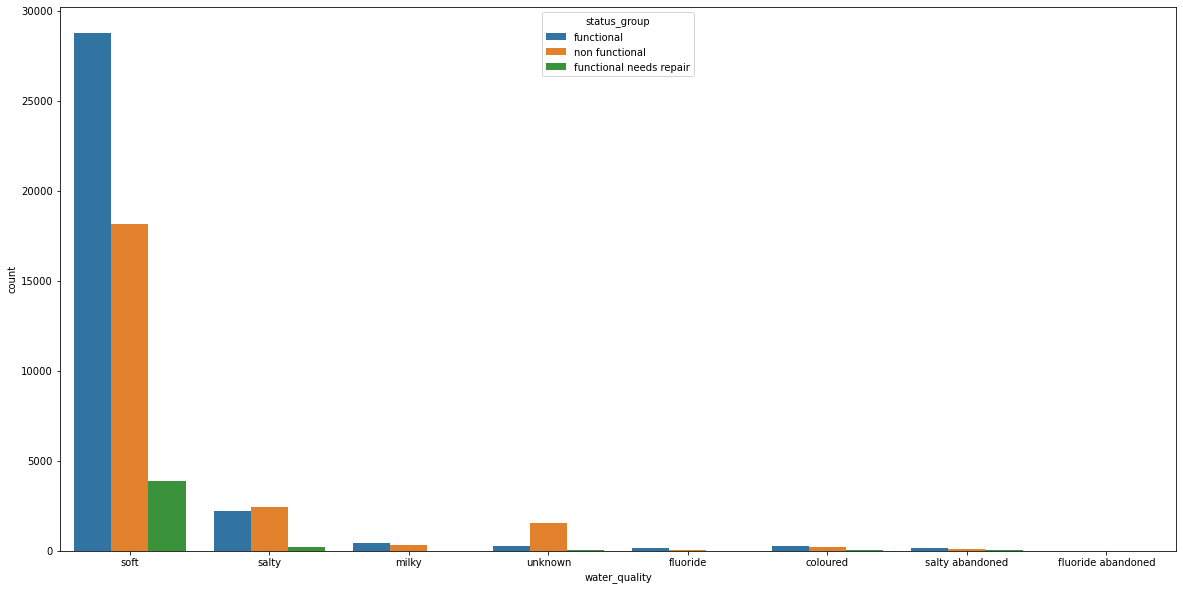

In [752]:

plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

Quantity, Quantity_group Columns

In [753]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [754]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [755]:
df.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

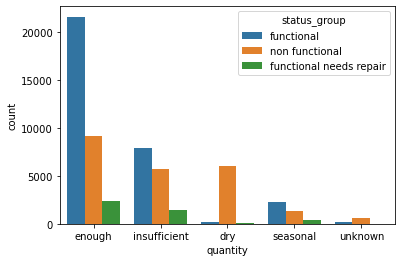

In [756]:
#The two columns contain more or less the same information
#quantity_column has to be dropped 
ax = sns.countplot(x='quantity', hue="status_group", data=df)

From the graph, it is evident that some wells have an adequate quantity of water but are non-functional. The correlation between dry water points and non-functionality is significant. When a water point is classified as dry or its quantity is unknown, there is a high likelihood that it is non-functional. Conversely, if the water quantity is sufficient, there is a higher probability of finding functional water points. This observation suggests that water quantity is an important factor in determining the functionality of water points.

source / source_type / source_class columns


In [757]:
df['source'].value_counts()


spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [758]:
df['source_type'].value_counts()


spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [759]:
df['source_class'].value_counts()


groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [760]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column


amount_tsh  date_recorded  funder  \
source_class source                                                    
groundwater  hand dtw                     874            874     868   
             machine dbh                11075          11075   10252   
             shallow well               16824          16824   16302   
             spring                     17021          17021   15870   
surface      dam                          656            656     647   
             lake                         765            765     763   
             rainwater harvesting        2295           2295    2099   
             river                       9612           9612    8715   
unknown      other                        212            212     204   
             unknown                       66             66      45   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     874        868        874       874   
             machine dbh                11075      10246      11075     11075   
             shallow well               16824      16286      16824     16824   
             spring                     17021      15870      17021     17021   
surface      dam                          656        646        656       656   
             lake                         765        762        765       765   
             rainwater harvesting        2295       2096       2295      2295   
             river                       9612       8721       9612      9612   
unknown      other                        212        204        212       212   
             unknown                       66         46         66        66   

                                   wpt_name  num_private  basin  ...  payment  \
source_class source                                              ...            
groundwater  hand dtw                   874          874    874  ...      874   
             machine dbh              11075        11075  11075  ...    11075   
             shallow well             16824        16824  16824  ...    16824   
             spring                   17021        17021  17021  ...    17021   
surface      dam                        656          656    656  ...      656   
             lake                       765          765    765  ...      765   
             rainwater harvesting      2295         2295   2295  ...     2295   
             river                     9612         9612   9612  ...     9612   
unknown      other                      212          212    212  ...      212   
             unknown                     66           66     66  ...       66   

                                   payment_type  water_quality  quality_group  \
source_class source                                                             
groundwater  hand dtw                       874            874            874   
             machine dbh                  11075          11075          11075   
             shallow well                 16824          16824          16824   
             spring                       17021          17021          17021   
surface      dam                            656            656            656   
             lake                           765            765            765   
             rainwater harvesting          2295           2295           2295   
             river                         9612           9612           9612   
unknown      other                          212            212            212   
             unknown                         66             66             66   

                                   quantity  quantity_group  source_type  \
source_class source                                                        
groundwater  hand dtw                   874             874          874   
             machine db

To avoid redundancy , we will drop the columns 'source_type' and 'source_class' since they contain the same information as the 'source' column. The 'source' column provides more detailed information, making it the preferred choice to retain. By removing the redundant columns, we simplify the dataset and maintain the most informative feature for further analysis.

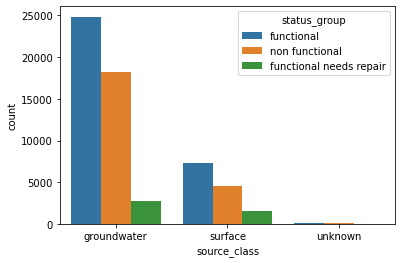

In [761]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)


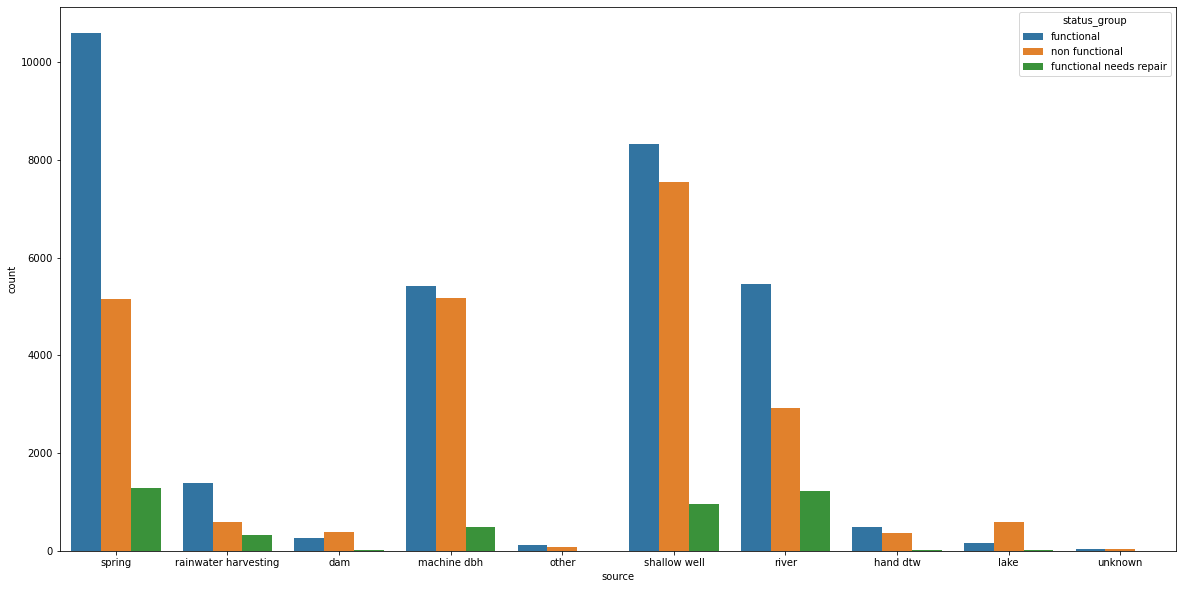

In [762]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

Waterpoint_type / Waterpoint_type_group Columns

In [763]:
df['waterpoint_type'].value_counts()


communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [764]:
df['waterpoint_type_group'].value_counts()


communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [765]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

Decided to keep 'waterpoint_type' which contains more detail.



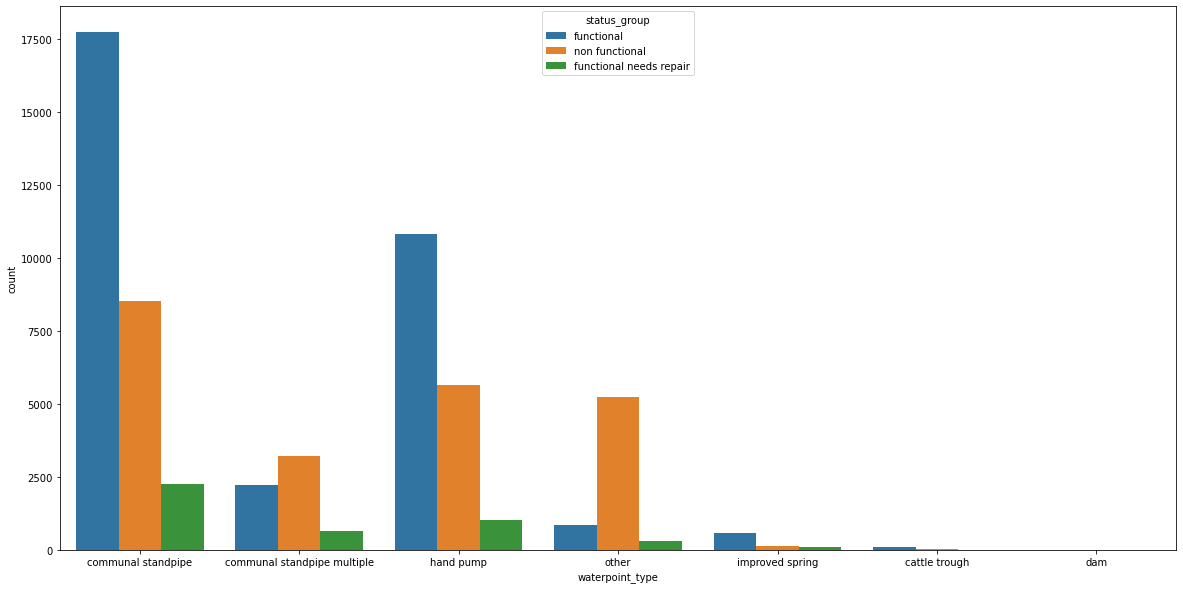

In [766]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

The type of waterpoint has a correlation with the functionality of water points. For instance, communal standpipes have a higher likelihood of being functional, while communal standpipe multiple and other types have a higher probability of being non-functional. This indicates that the specific type of waterpoint is associated with the functionality status of the water points.

DATA CLEANING AND EDA

Eliminating features that we found to be redudant or unuseable for our models.


In [767]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )


In [768]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_group', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group'],
      dtype='object')

Dealing with missing data 

In [769]:
def data_missing(data):
    """Identify if the data has missing values"""
    # identify columns with missing values
    missing_cols = data.columns[data.isnull().any()]
    # calculate number of missing values in each column
    missing_sum = data[missing_cols].isnull().sum()
    # calculate percentage of missing values in each column
    missing_pct = data[missing_cols].isnull().sum() / data.shape[0] * 100

    # check if there are missing values
    if len(missing_cols) == 0:
        out = print("The data has no missing values.")
    else:
        out = print(f"The data has missing values in the following columns:\n{missing_cols}\n\nThe total number of missing values in each column:\n{missing_sum}\n \n{missing_pct}\n")
    return out

data_missing(df)

The data has missing values in the following columns:
Index(['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_name',
       'permit'],
      dtype='object')

The total number of missing values in each column:
funder             3635
installer          3655
subvillage          371
public_meeting     3334
scheme_name       28166
permit             3056
dtype: int64
 
funder             6.119529
installer          6.153199
subvillage         0.624579
public_meeting     5.612795
scheme_name       47.417508
permit             5.144781
dtype: float64



In [770]:
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [771]:
identify_duplicates(df)

The Data has 36 duplicated rows.
This constitutes 0.061% of the data set. 



In [772]:
def evaluate_outliers(data, sample_size=1000):
    """Function to evaluate outliers in numeric columns and plot their distributions"""
    # Select numeric columns
    numeric_columns = data.select_dtypes(include='number').columns
    # Randomly sample the data
    data_sample = data.sample(n=sample_size, random_state=42)
    # Iterate over numeric columns
    for column in numeric_columns:
        # Plot boxplot for the column
        plt.figure(figsize=(10, 2))
        plt.boxplot(data_sample[column], notch=True, sym='r.')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.title(f'Boxplot of {column}')
        plt.show()

In [773]:
df['construction_year'].value_counts()


0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

A new feature has been added to the dataset where the year values are converted to decades for future encoding. In this conversion, the value of zero represents missing values. Since the missing values constitute a majority of the dataset, they are not replaced with the mean or median. Instead, a new value representing the missing values in decades is introduced and retained in the dataset. This approach allows for proper handling of missing values while preserving the integrity of the data during the encoding process.

In [774]:
#creating new columns

df['decade'] = df['construction_year']


In [775]:
# dividing the construction year column to decades

df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [776]:
df['decade'].value_counts()


0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: decade, dtype: int64

In [777]:
# finding mean and median without zero values using boolean 
df.loc[df['construction_year']!=0].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


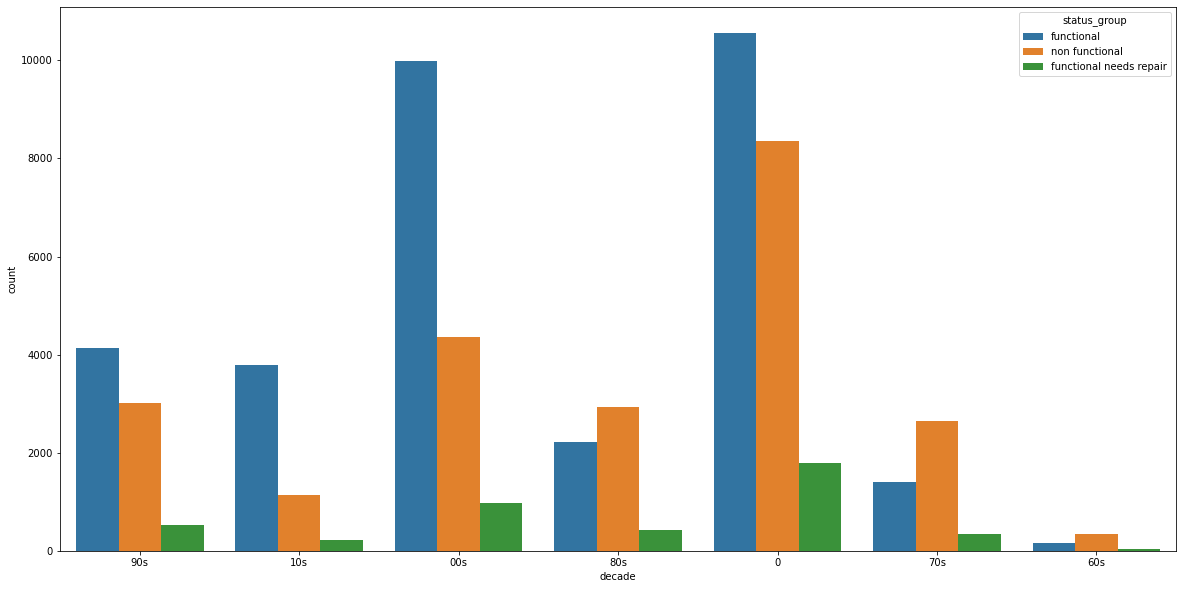

In [778]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

In [779]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_name', 'permit',
       'construction_year', 'extraction_type_group', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group', 'decade'],
      dtype='object')

EXPLORING MORE COLUMNS TO KNOW WHAT TO WORK WITH

Date recorded Column 

In [780]:
df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-27      1
2011-09-19      1
2002-10-14      1
2011-09-21      1
2011-09-14      1
Name: date_recorded, Length: 356, dtype: int64

Funder column 

In [781]:
#fill the missing values and zeros in the 'funder' column with the value 'Unknown' and then display the top 15df['funder']
df['funder'] = df['funder'].fillna('Unknown').replace('0', 'Unknown')
df['funder'].value_counts().head(15)


Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Name: funder, dtype: int64

The 'funder' column contains information about the funders or organizations involved in funding the water points. 

From the top 15 most frequent funders in the column, we can observe the following:

- The most common funder is "Government Of Tanzania" with 9,084 occurrences.
- There are 4,416 instances where the funder is labeled as "Unknown", indicating missing or unspecified information.
- Other prominent funders include "Danida" with 3,114 occurrences, "Hesawa" with 2,202 occurrences, and "Rwssp" with 1,374 occurrences.
- Several international organizations, such as "World Bank" (1,349 occurrences), "World Vision" (1,246 occurrences), and "Unicef" (1,057 occurrences), are also involved in funding water points.
- There are funders related to specific groups or entities, such as "Kkkt" (1287 occurrences) and "District Council" (843 occurrences).
- Some funders appear to be abbreviations or acronyms, such as "Dhv" (829 occurrences), "Dwsp" (811 occurrences), and "Dwe" (484 occurrences).
- The presence of "Unknown" and the high count of occurrences for certain funders suggest the need for further data cleaning.

These insights provide an overview of the distribution and frequency of different funders in the dataset, which can help in understanding the funding landscape related to the water points.

In [782]:
#working with the first 15 of this column 
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
       df13, df14, df15]

df_funder = pd.concat(dfs, ignore_index=True)


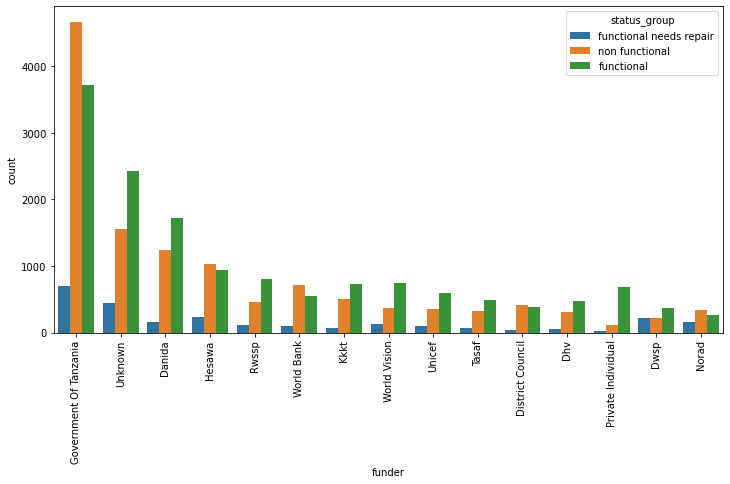

In [783]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_funder, x='funder', hue='status_group')
plt.xticks(rotation=90)
plt.show()


The plot shows that what water points funded by the government of Tanzania, majority are non-functional

In [784]:
df['funder_cat'] = df['funder'].copy()  # Creating a new column

c_fund = ['Danida', 'Unknown', 'Government Of Tanzania', 'Hesawa', 'Rwssp', 'World Bank', 'Kkkt', 'World Vision',
          'Unicef', 'Tasaf', 'District Council', 'Dhv', 'Private Individual', 'Dwsp', 'Norad']

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

unique_count = df['funder_cat'].nunique()
print("Unique values in 'funder_cat':", unique_count)


Unique values in 'funder_cat': 16


wpt_name / scheme_name /region/ region_code columns

In [785]:
df['wpt_name'].value_counts()

none                  3563
Shuleni               1748
Zahanati               830
Msikitini              535
Kanisani               323
                      ... 
Kwa Kasolo               1
Kwaali Mwarabu 1         1
Mwamahaha                1
Kwa Mzee Mlaponi         1
Kwa Chautipe Sanga       1
Name: wpt_name, Length: 37400, dtype: int64

In [786]:
df['scheme_name'].value_counts()

K                             682
None                          644
Borehole                      546
Chalinze wate                 405
M                             400
                             ... 
Misambo mlimani                 1
TM part Three water supply      1
Tove-mtwango                    1
Charles Mushi  Branch line      1
Iyan                            1
Name: scheme_name, Length: 2696, dtype: int64

In [787]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [788]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

Dropping the 'wpt_name' 'region_code' columns

In [789]:
df.drop(['wpt_name', 'scheme_name','region_code'], axis=1, inplace=True)


When reviewing the columns "wpt_name," "scheme_name," and "region_code" we found that they do not provide any information about functionality. As a result, we have decided to drop these columns from the dataframe.

Additionally, we have chosen to drop the "region_code" column because the "region" column already contains more comprehensive information about the region. By removing the redundant "region_code" column, we can simplify the dataframe.

Before dropping any columns, it is a good practice to check for duplicated values in the dataframe to avoid potential issues related to plagiarism or data integrity. By identifying and handling duplicated values appropriately, we can ensure the accuracy and reliability of our analysis.

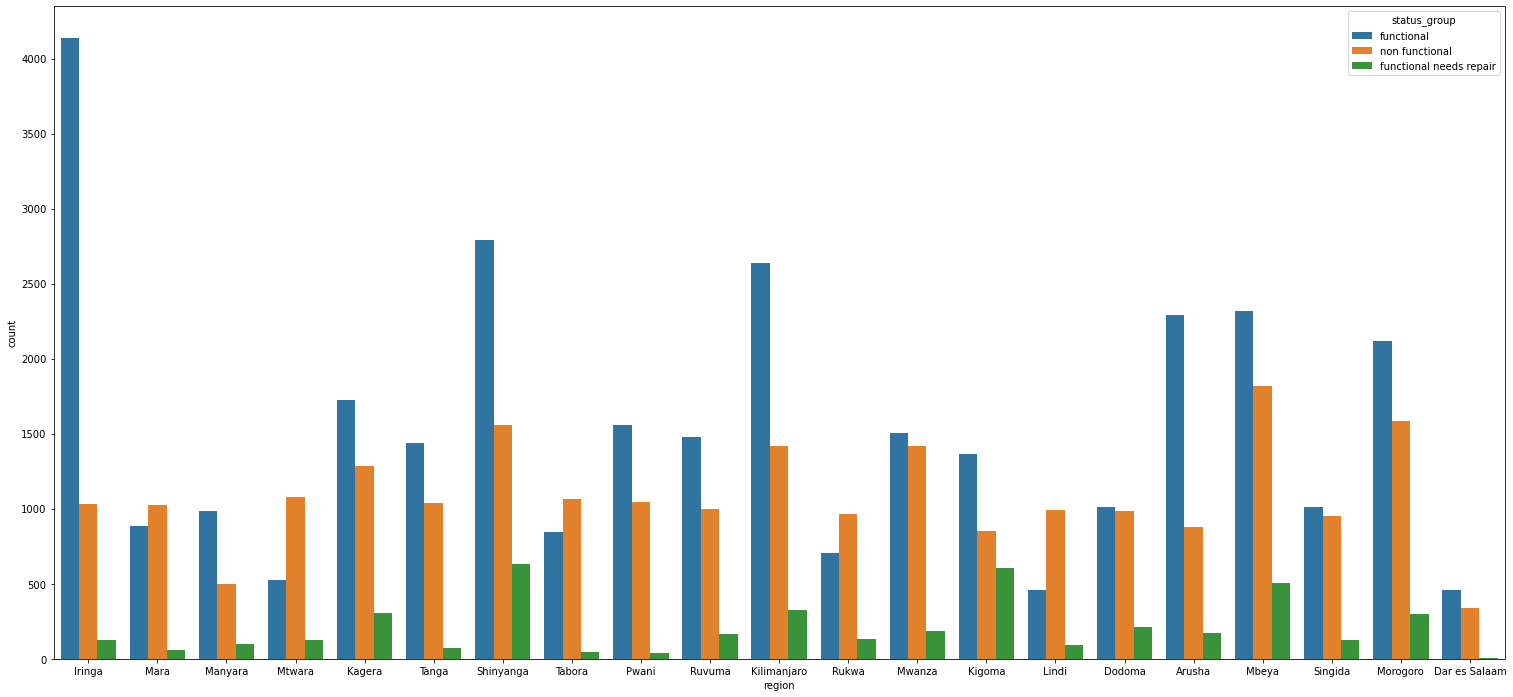

In [790]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)


In [791]:
def plot_categorical_distribution(df, column):
    if column in df.columns:
        if df[column].dtype == 'object':
            plt.figure(figsize=(15, 6))
            top_categories = df[column].value_counts().nlargest(15).index
            sns.countplot(data=df, x=column, hue='status_group', order=top_categories)
            plt.title(f"Distribution of {column} by status_group")
            plt.xlabel(column)
            plt.xticks(rotation=90)
            plt.legend(title='status_group')
            plt.show()

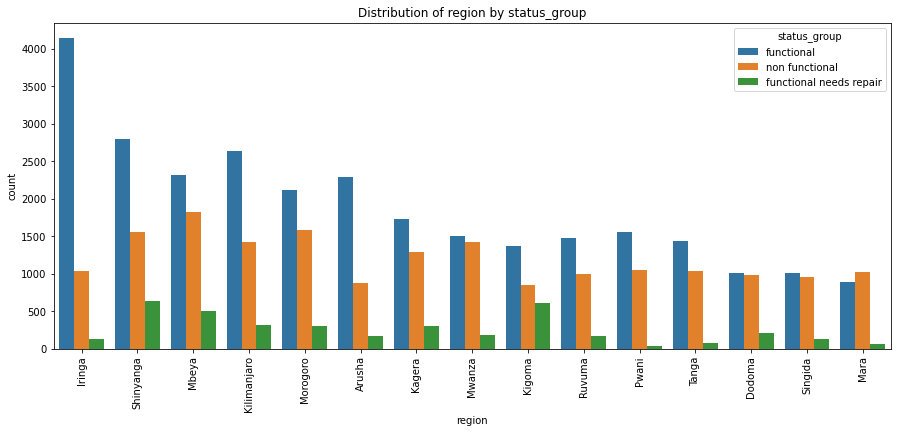

In [792]:
plot_categorical_distribution(df,'region')

Some regions have high functional water wells, Iringa, shinyanga, Kilimanjaro region 

In [793]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area


In [794]:
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality status_group                                                 
coloured      functional                        1              1       1   
              non functional                    1              1       1   
salty         functional                       19             19      19   
              non functional                    8              8       8   
soft          functional                     4120           4120    4120   
              functional needs repair         123            123     123   
              non functional                  983            983     983   
unknown       functional                        1              1       1   
              non functional                   38             38      38   

                                       gps_height  installer  longitude  \
water_quality status_group                                                
coloured      functional                        1          1          1   
              non functional                    1          1          1   
salty         functional                       19         19         19   
              non functional                    8          8          8   
soft          functional                     4120       4115       4120   
              functional needs repair         123        123        123   
              non functional                  983        982        983   
unknown       functional                        1          1          1   
              non functional                   38         38         38   

                                       latitude  num_private  basin  \
water_quality status_group                                            
coloured      functional                      1            1      1   
              non functional                  1            1      1   
salty         functional                     19           19     19   
              non functional                  8            8      8   
soft          functional                   4120         4120   4120   
              functional needs repair       123          123    123   
              non functional                983          983    983   
unknown       functional                      1            1      1   
              non functional                 38           38     38   

                                       subvillage  ...  permit  \
water_quality status_group                         ...           
coloured      functional                        1  ...       1   
              non functional                    1  ...       1   
salty         functional                       19  ...      19   
              non functional                    8  ...       8   
soft          functional                     4120  ...    4117   
              functional needs repair         123  ...     123   
              non functional                  983  ...     983   
unknown       functional                        1  ...       1   
              non functional                   38  ...      38   

                                       construction_year  \
water_quality status_group                                 
coloured      functional                               1   
              non functional                           1   
salty         functional                              19   
              non functional                           8   
soft          functional                            4120   
              functional needs repair                123   
              non functional                         983   
unknown       functional                               1   
              non functional                          38   

                                       extraction_type_group  management  \
water_quality status_group                                                 
coloured      functional                              

In [795]:
import plotly.express as px

fig = px.histogram(df_iringa, x='water_quality', color='status_group')

fig.update_layout(
    title='Count of Status Group by Water Quality in Iringa',
    xaxis_title='Water Quality',
    yaxis_title='Count',
    legend_title='Status Group',
    xaxis={'categoryorder': 'total descending'},  # Sort x-axis categories by count
    bargap=0.2  # Set the gap between bars
)

fig.show()



In [796]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

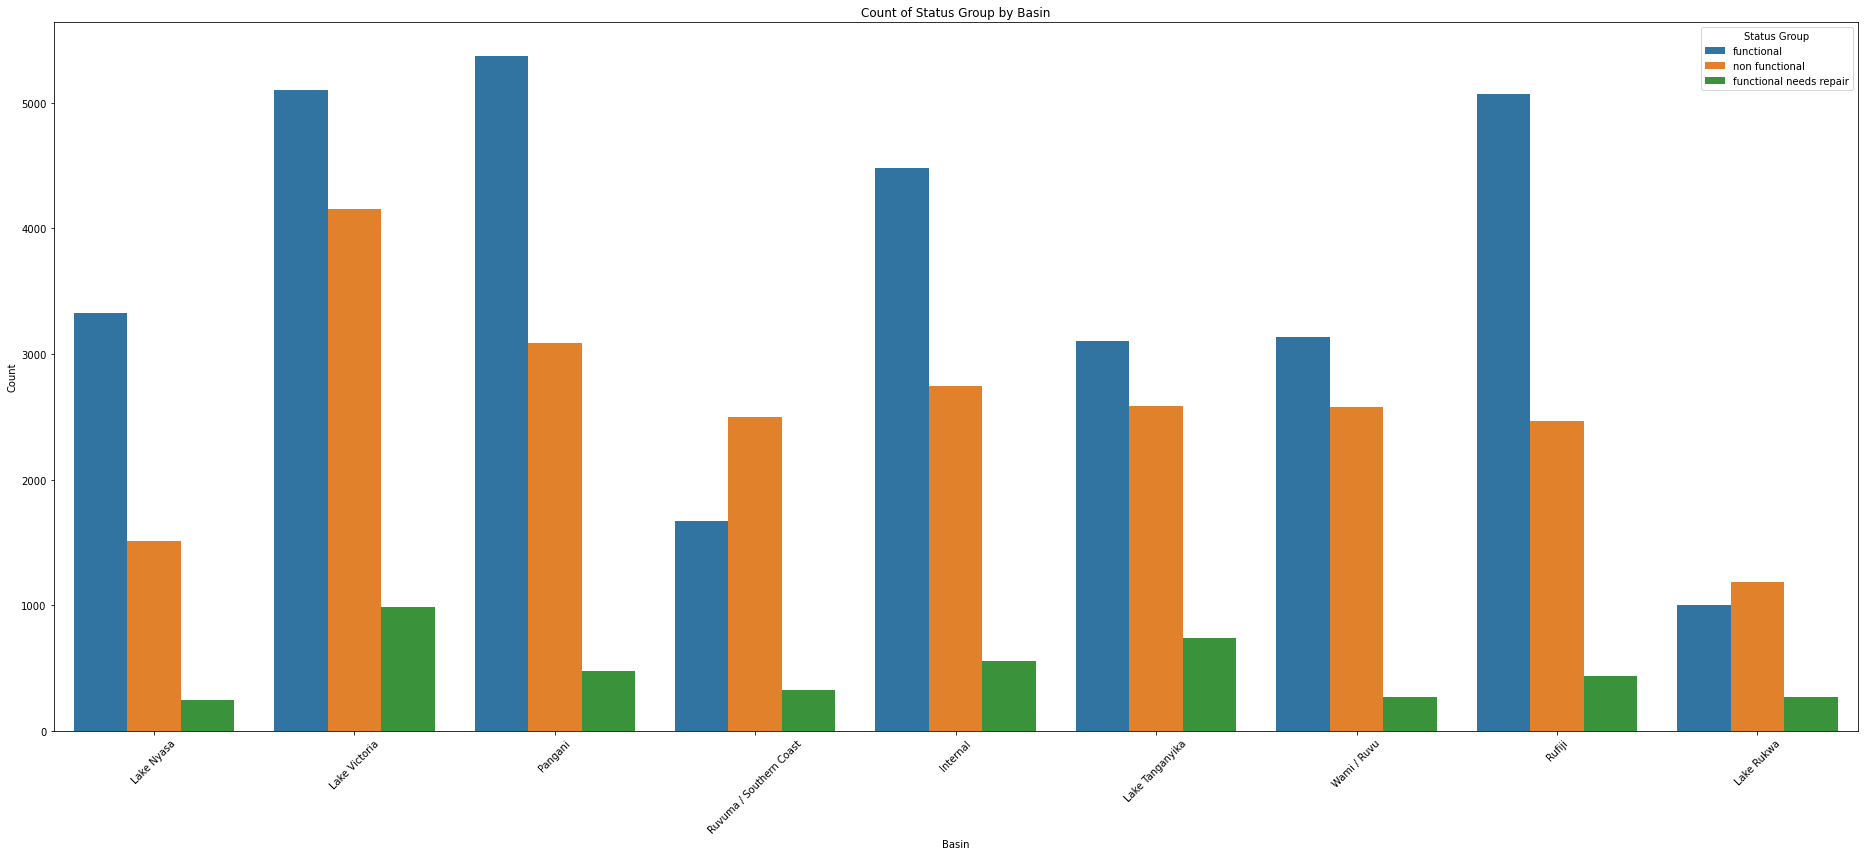

In [797]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(26, 12))
ax = sns.countplot(x='basin', hue='status_group', data=df)

ax.set_title('Count of Status Group by Basin')
ax.set_xlabel('Basin')
ax.set_ylabel('Count')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.legend(title='Status Group')
plt.tight_layout()

plt.show()



In [798]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,decade,funder_cat
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,...,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional,90s,Others
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,Others
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,...,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional,00s,Others
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,...,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional,80s,Unicef
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional,0,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kiduruni,...,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,Others
59396,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Igumbilo,...,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional,90s,Others
59397,0.0,2011-04-11,Unknown,0,NaN,34.017087,-8.750434,0,Rufiji,Madungulu,...,swn 80,vwc,pay monthly,fluoride,enough,machine dbh,hand pump,functional,0,Unknown
59398,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Mwinyi,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional,0,Others


In [799]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)


In [800]:
df['status_group'].value_counts()


0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [801]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(20)

amount_tsh  date_recorded  funder  \
quantity water_quality      status_group                                      
dry      coloured           1                      1              1       1   
                            2                     28             28      28   
         fluoride           2                      2              2       2   
         fluoride abandoned 2                      2              2       2   
         milky              2                    119            119     119   
         salty              0                     11             11      11   
                            1                      1              1       1   
                            2                    638            638     638   
         salty abandoned    0                      1              1       1   
                            2                     12             12      12   
         soft               0                    136            136     136   
                            1                     19             19      19   
                            2                   4272           4272    4272   
         unknown            0                      9              9       9   
                            1                     16             16      16   
                            2                    979            979     979   
enough   coloured           0                    107            107     107   
                            1                     11             11      11   
                            2                     53             53      53   
         fluoride           0                     66             66      66   

                                          gps_height  installer  longitude  \
quantity water_quality      status_group                                     
dry      coloured           1                      1          1          1   
                            2                     28         28         28   
         fluoride           2                      2          2          2   
         fluoride abandoned 2                      2          2          2   
         milky              2                    119        118        119   
         salty              0                     11         11         11   
                            1                      1          1          1   
                            2                    638        637        638   
         salty abandoned    0                      1          1          1   
                            2                     12         12         12   
         soft               0                    136        135        136   
                            1                     19         16         19   
                            2                   4272       4240       4272   
         unknown            0                      9          4          9   
                            1                     16          0         16   
                            2                    979        574        979   
enough   coloured           0                    107        102        107   
                            1                     11         10         11   
                            2                     53         52         53   
         fluoride           0                     66         54         66   

                                          latitude  num_private  basin  \
quantity water_quality      status_group                                 
dry      coloured           1                    1            1      1   
                            2                   28           28     28   
         fluoride           2                    2            2      2   
         fluoride abandoned 2                    2            2      2   
         milky              2                  119          119    119   
         salty              0                   11           11     

Results 

Cleaning Method

Numerous null values, missing values, and redundant features are present in the data. Data cleansing and dealing with severely unbalanced target labels are the two key challenges in this project.
In this notebook, we try to address cleaning challenges. Some columns that contained the same data were removed. Missing, incorrect, and null values were replaced to mean, median, or unknown. Some characteristics' values have been compiled and grouped.
Under the titles of the pertinent columns in this notebook are detailed data cleansing techniques. It is explained how and why the column was cleansed.


Explorations

In general, places with more populations have more working wells.
Some places have a higher likelihood of having access to clean water, particularly if they are close to effective basins.
Despite being one of the cities with the biggest population, 35% of the good water quality locations in Dar le Salaam are inoperable.
Iringa is a significant area, however it has several soft water water points that are inoperable.
Government-funded wells are frequently non-operational.
The majority of the water points erected by the district council and the national government are inoperable.
Gravity extraction is the most popular, followed by hand pumps. Hand pumps are less effective than industrial pumps. It demonstrates that authorities must concentrate on pumping style. As may be observed, there

Feature Engineering


The funder and installer columns both contain a large number of category items. If a feature's value is not one of the top 20 most frequent values, we construct new columns that gather those values as "others." Additionally, there are numerous spelling errors in these columns, which gives them new, distinct values. We located and repaired the top 100 frequently used installers. After that, I created a new column with categorized values.
Although construction years are in integer format, they are not continuous data, and the model does not make sense with these values. We separated them into decades and treated each decade as a separate category.